In [155]:
# importing data for all questions , then we will keep on cleaning as per the question requirements
import pandas as pd
df = pd.read_csv('properties.csv',low_memory=False)

### Question1
- Step 1: Here first we have cleaned the data . Removed the rows with no prices and removed outliers (two houses worth 280cr and 4080cr)
- Step2 : Created quantiles for the price column , and divided among high ,low  and medium price properties , where `high>2cr` , `low<=87` lakh and `87<medium<=2cr`.
- Step3: Plotted chart , and for better visulisation plotted log10 chart also

[1.0e+05 8.7e+06 2.0e+07 4.5e+08]


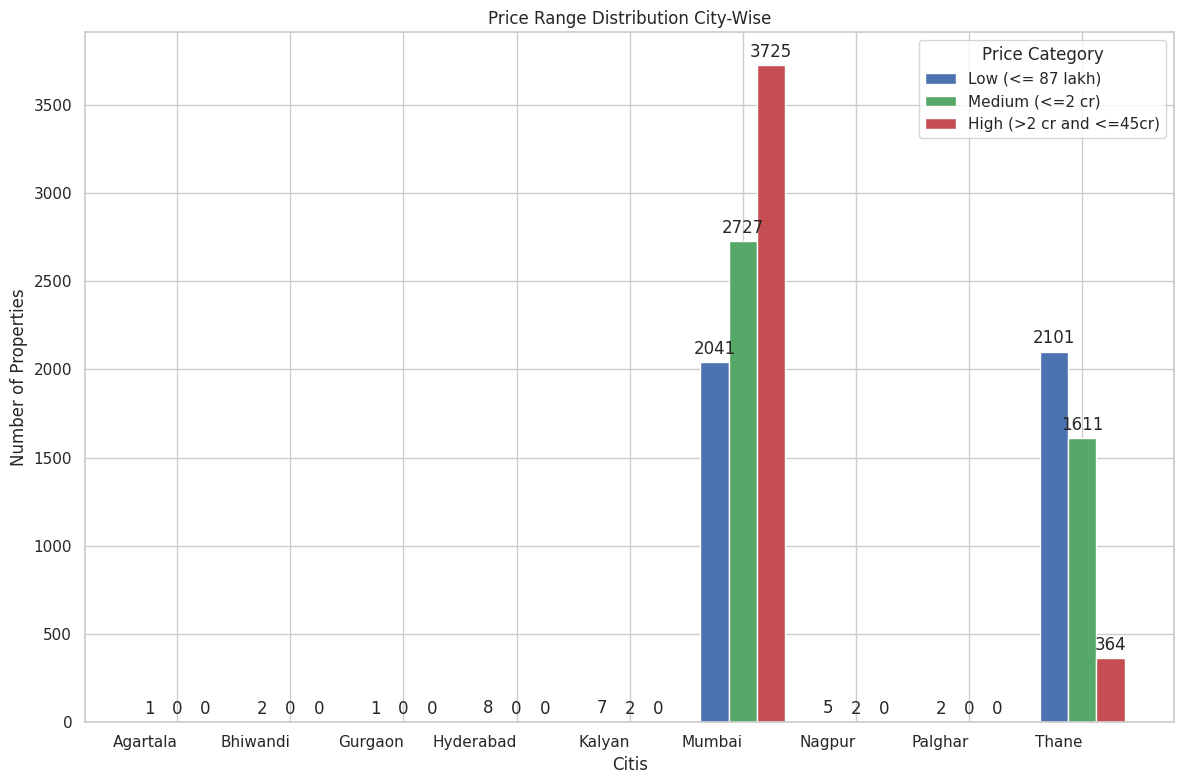

In [156]:
import matplotlib.pyplot as plt
import numpy as np
df1 = df.copy()
df_sorted = df1.sort_values(by='Price')

df_cleaned = df_sorted.dropna(subset=['Price'])
df_cleaned = df_cleaned[(df_cleaned['Price (English)'] != '280 Cr') & (df_cleaned['Price (English)'] != '4080 Cr')]
# putting in csv for cross checking
# df_cleaned.to_csv('cleaned_properties.csv', index=False)

# Representing prices on normal curve was more intutive insted of manually giving range and we got better plot
quantiles = df_cleaned['Price'].quantile([0, 0.33, 0.67, 1]).values
print(quantiles)
def price_range(price):
    if price <= quantiles[1]:     # Low price
        return 'Low'
    elif price <= quantiles[2]:  # Medium price
        return 'Medium'
    else:                       # High price
        return 'High'

df_cleaned['price_category'] = df_cleaned['Price'].apply(price_range)

city_price_distribution = df_cleaned.groupby(['City', 'price_category']).size().unstack(fill_value=0)

bar_width = 0.25
cities = np.arange(len(city_price_distribution.index))
fig, axes = plt.subplots(figsize=(12, 8))

bars_low = axes.bar(cities - bar_width, city_price_distribution['Low'], color='b', width=bar_width, label='Low (<= 87 lakh)')
bars_medium = axes.bar(cities, city_price_distribution['Medium'], color='g', width=bar_width, label='Medium (<=2 cr)')
bars_high = axes.bar(cities + bar_width, city_price_distribution['High'], color='r', width=bar_width, label='High (>2 cr and <=45cr)')

axes.set_xlabel('Citis')
axes.set_ylabel('Number of Properties')
axes.set_title('Price Range Distribution City-Wise')
axes.set_xticks(cities)
axes.set_xticklabels(city_price_distribution.index, ha='right')
axes.legend(title='Price Category')

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        axes.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars_low)
add_labels(bars_medium)
add_labels(bars_high)
plt.tight_layout()
plt.show()



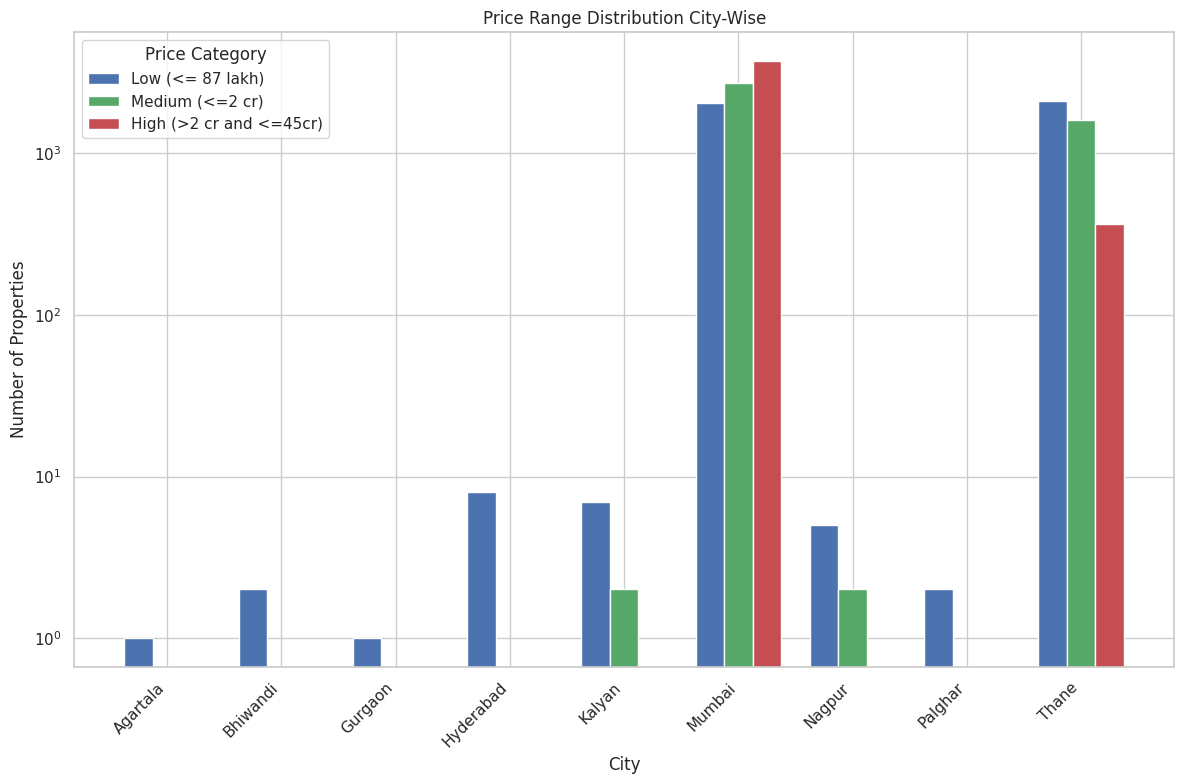

In [157]:
# creating logged bar chart for better visulization of smaller bars
fig, axes2 = plt.subplots(figsize=(12, 8))
bars_low = axes2.bar(cities - bar_width, city_price_distribution['Low'], color='b', width=bar_width, label='Low (<= 87 lakh)')
bars_medium = axes2.bar(cities, city_price_distribution['Medium'], color='g', width=bar_width, label='Medium (<=2 cr)')
bars_high = axes2.bar(cities + bar_width, city_price_distribution['High'], color='r', width=bar_width, label='High (>2 cr and <=45cr)')

axes2.set_xlabel('City')
axes2.set_ylabel('Number of Properties')
axes2.set_title('Price Range Distribution City-Wise')
axes2.set_xticks(cities)
axes2.set_xticklabels(city_price_distribution.index, rotation=45, ha='right')
axes2.legend(title='Price Category')
axes2.set_yscale('log')  # Use logarithmic scale for y-axes2is

add_labels(bars_low)
add_labels(bars_medium)
add_labels(bars_high)

# Display the plot
plt.tight_layout()
plt.show()


### Question 2
- Step 1: Cleaned the data ,

In [158]:
df2 = df.copy()
df2['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df2.dropna(subset=['Price', 'Type of Property', 'City'], inplace=True)
df2.drop_duplicates(inplace=True)

In [159]:
summary = df2.groupby(['Type of Property', 'City']).agg(
    Average_Price_in_lakh=('Price', 'mean'),
    Property_Count=('Price', 'count')
).reset_index()

summary['Average_Price_in_lakh'] = summary['Average_Price_in_lakh'] / 1e6 
summary['Average_Price_in_lakh'] = summary['Average_Price_in_lakh'].round(2)
print(summary)


           Type of Property       City  Average_Price_in_lakh  Property_Count
0                 Apartment   Agartala                   5.12               1
1                 Apartment   Bhiwandi                   2.20               2
2                 Apartment    Gurgaon                   3.50               1
3                 Apartment  Hyderabad                   7.65               1
4                 Apartment     Kalyan                   5.53               9
5                 Apartment     Mumbai                  34.09            8138
6                 Apartment     Nagpur                   6.39               7
7                 Apartment    Palghar                   4.15               2
8                 Apartment      Thane                  10.70            3876
9   Builder Floor Apartment     Mumbai                  12.50             111
10  Builder Floor Apartment      Thane                   6.49              94
11                Penthouse     Mumbai                 104.02   

In [160]:
# Group data by 'Type of Property' and 'City', and calculate average price
summary_2 = df2.groupby(['Type of Property', 'City']).agg(
    Average_Price=('Price', 'mean'),
    Property_Count=('Price', 'count')
).reset_index()

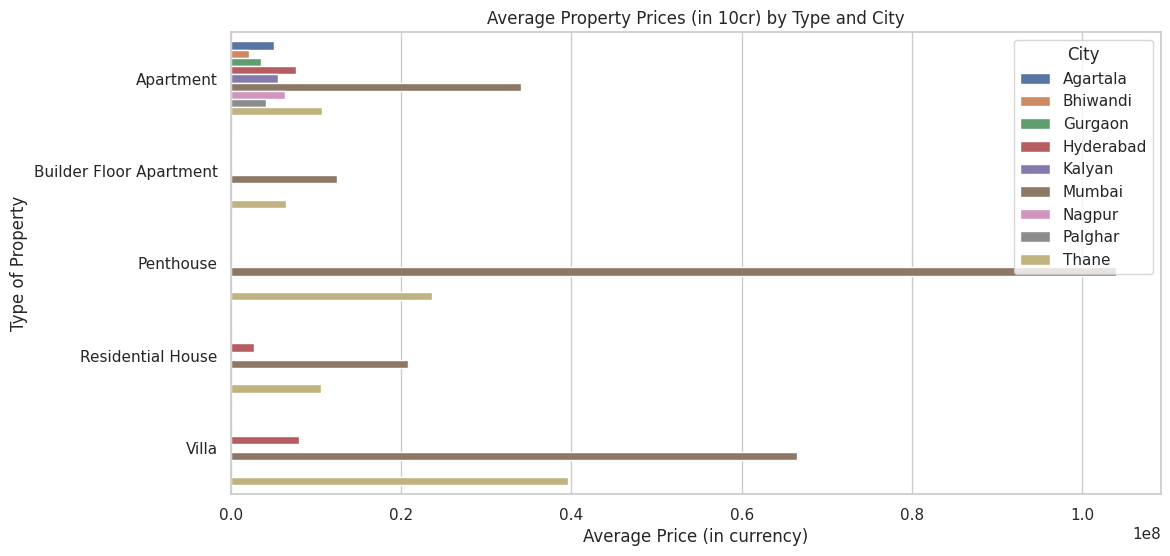

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_2, x='Average_Price', y='Type of Property', hue='City')
plt.title('Average Property Prices (in 10cr) by Type and City')
plt.xlabel('Average Price (in currency)')
plt.ylabel('Type of Property')
plt.legend(title='City')
plt.show()

/tmp/ipykernel_3926/768673398.py:1: DtypeWarning:

Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.



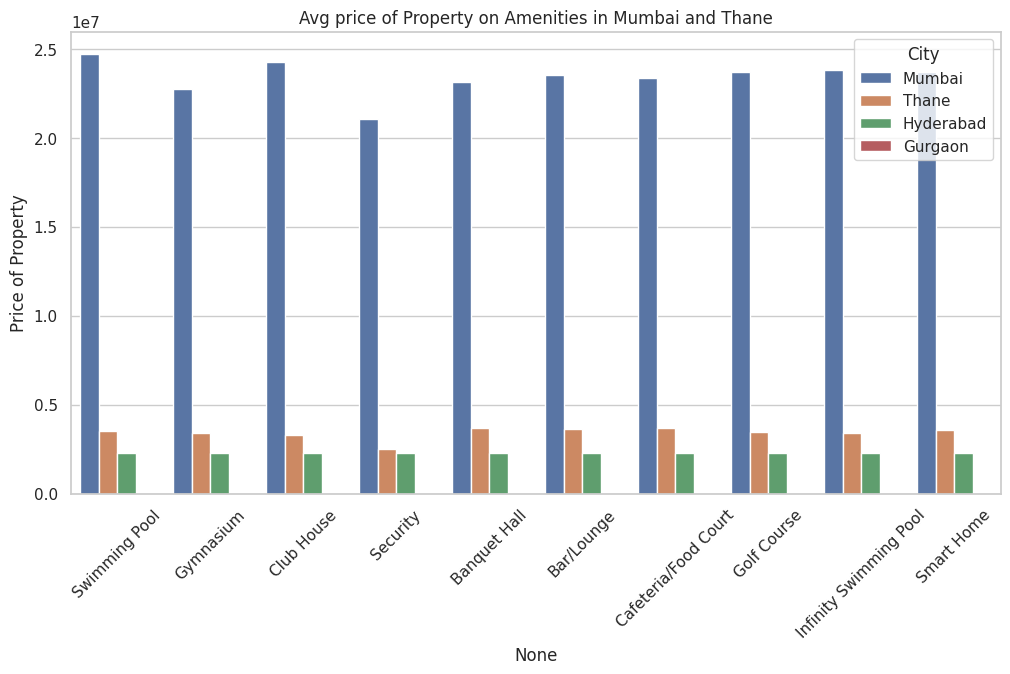

In [162]:
data = pd.read_csv('properties.csv')

# print(data.head())
# print(data.columns)
data_mumbai = data[data['City'] == 'Mumbai']
data_thane = data[data['City'] == 'Thane']
data_kalyan = data[data['City']== 'Kalyan']
data_gurgaon = data[data['City']== 'Gurgaon']
data_hyderabad = data[data['City']== 'Hyderabad']


# took these essential amenities only
amenities = ['Swimming Pool', 'Gymnasium', 'Club House', 'Security','Banquet Hall', 'Bar/Lounge', 'Cafeteria/Food Court','Golf Course', 'Infinity Swimming Pool', 'Smart Home']

def analyze_amenities(data, city_name):
    # Calculate average price for properties with and without each amenity
    results = {}
    for amenity in amenities:
        with_amenity = data[data[amenity] == 1]['Price']
        without_amenity = data[data[amenity] == 0]['Price']
        results[amenity] = {
            'With Amenity Avg Price': with_amenity.mean(),
            'Without Amenity Avg Price': without_amenity.mean(),
            'Price Difference': with_amenity.mean() - without_amenity.mean()
        }
    
    # Convert results to DataFrame for better visualization
    results_df = pd.DataFrame(results).T
    results_df['City'] = city_name
    return results_df

# Analyze for both cities
results_mumbai = analyze_amenities(data_mumbai, 'Mumbai')
results_thane = analyze_amenities(data_thane, 'Thane')
# results_kalyan = analyze_amenities(data_kalyan, 'Kalyan')
results_hyderabad = analyze_amenities(data_hyderabad, 'Hyderabad')
results_gurgaon = analyze_amenities(data_gurgaon, 'Gurgaon')

# Combine results
final_results = pd.concat([results_mumbai, results_thane,results_hyderabad,results_gurgaon])

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=final_results.index, y='Price Difference', hue='City', data=final_results.reset_index())
plt.title('Avg price of Property on Amenities in Mumbai and Thane')
plt.ylabel('Price of Property')
plt.xticks(rotation=45)
plt.show()

# Display the final results
# print(final_results)

### Question 3
- Step 1: Here first we have cleaned the data and extract data of mumbai and thane.
- Step2 : Plotted pie chart for type of property in mumbai and thane
- Step 3: Plotted bart chart showing  avg price by property type in thane and mumbai
- Step 4: Plotted carpet area vs price in mumbai and thane for types of property

Number of each property type in Thane:
Type of Property
Apartment                  2863
Builder Floor Apartment      36
Penthouse                    12
Residential House            44
Villa                        24
Name: Thane, dtype: int64

Number of each property type in Mumbai:
Type of Property
Apartment                  6907
Builder Floor Apartment      31
Penthouse                    23
Residential House           108
Villa                        40
Name: Mumbai, dtype: int64


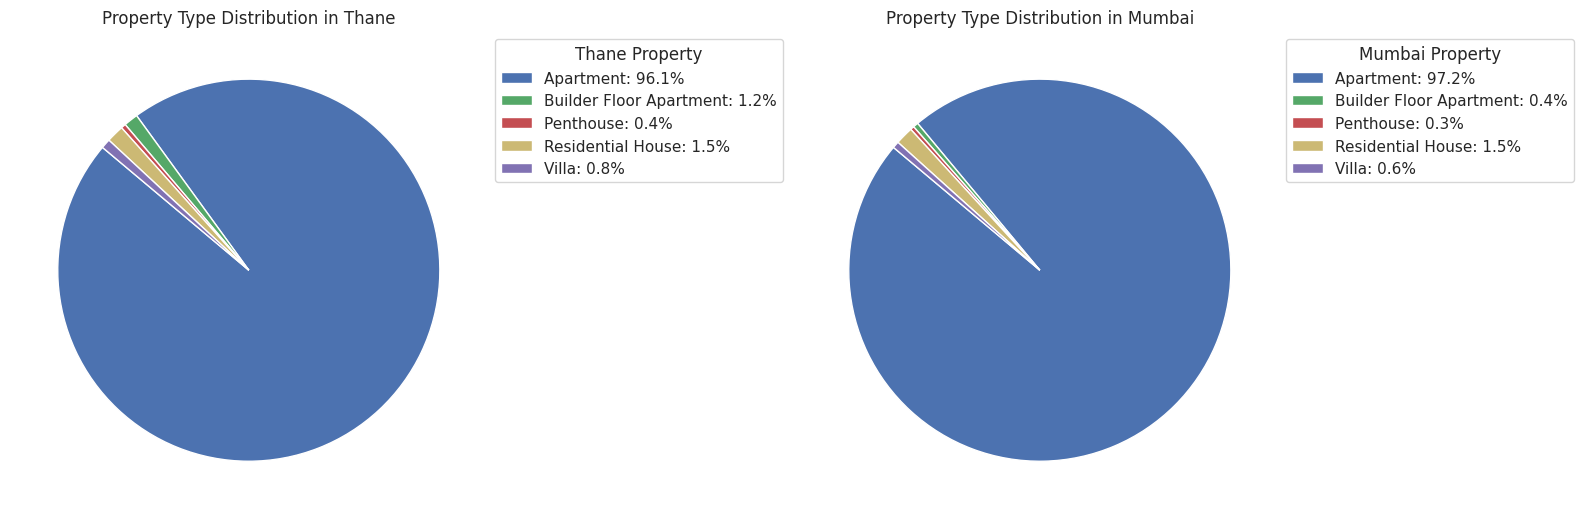

In [163]:
df3 = df.copy()
df_cleaned = df3.dropna(subset=['Price','Carpet Area'])
cities_of_interest = df_cleaned[df_cleaned['City'].isin(['Thane', 'Mumbai'])]
# data prep for chart1
city_vs_propertytype = cities_of_interest.groupby(['City', 'Type of Property']).size().unstack(fill_value=0)
thane_properties = city_vs_propertytype.loc['Thane']
mumbai_properties = city_vs_propertytype.loc['Mumbai']

print("Number of each property type in Thane:")
print(thane_properties)
print("\nNumber of each property type in Mumbai:")
print(mumbai_properties)

# giving colors to each propertytypes aplhabetically
colors = ['b', 'g', 'r', 'y', 'm']
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

thane_pie_chart, _ = axes[0].pie(thane_properties, colors=colors, startangle=140)
axes[0].set_title('Property Type Distribution in Thane')

mumbai_pie_chart, _ = axes[1].pie(mumbai_properties, colors=colors, startangle=140)
axes[1].set_title('Property Type Distribution in Mumbai')
thanelegend = [f'{ptype}: {round(100 * p / thane_properties.sum(), 1)}%' 
                       for ptype, p in zip(thane_properties.index, thane_properties)]
mumbailegend = [f'{ptype}: {round(100 * p / mumbai_properties.sum(), 1)}%' 
                        for ptype, p in zip(mumbai_properties.index, mumbai_properties)]

axes[0].legend(thane_pie_chart, thanelegend, title="Thane Property", bbox_to_anchor=(1, 1))
axes[1].legend(mumbai_pie_chart, mumbailegend, title="Mumbai Property", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

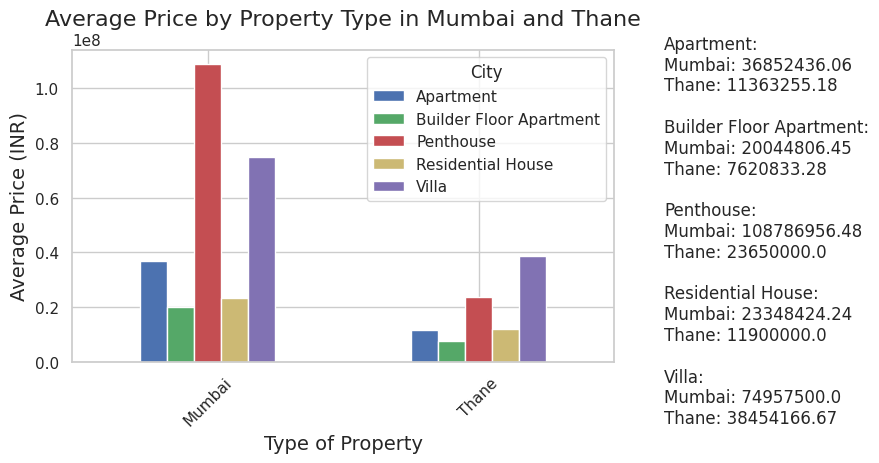

In [164]:

# Calculate avg price for each property type and city
mean_prices = cities_of_interest.groupby(['City', 'Type of Property'])['Price'].mean().unstack()

plt.figure(figsize=(12, 8))
mean_prices.plot(kind='bar', color=['b', 'g', 'r', 'y', 'm'])

plt.title('Average Price by Property Type in Mumbai and Thane', fontsize=16)
plt.xlabel('Type of Property', fontsize=14)
plt.ylabel('Average Price (INR)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='City')
price_text = ''
for city in mean_prices.columns:
    price_text += f"\n{city}:\n" + '\n'.join([f"{index}: {round(mean_prices.loc[index, city], 2)}" for index in mean_prices.index]) + '\n'

plt.figtext(1.05, 0.5, price_text, fontsize=12, ha="left", va="center")
plt.tight_layout()
plt.show()

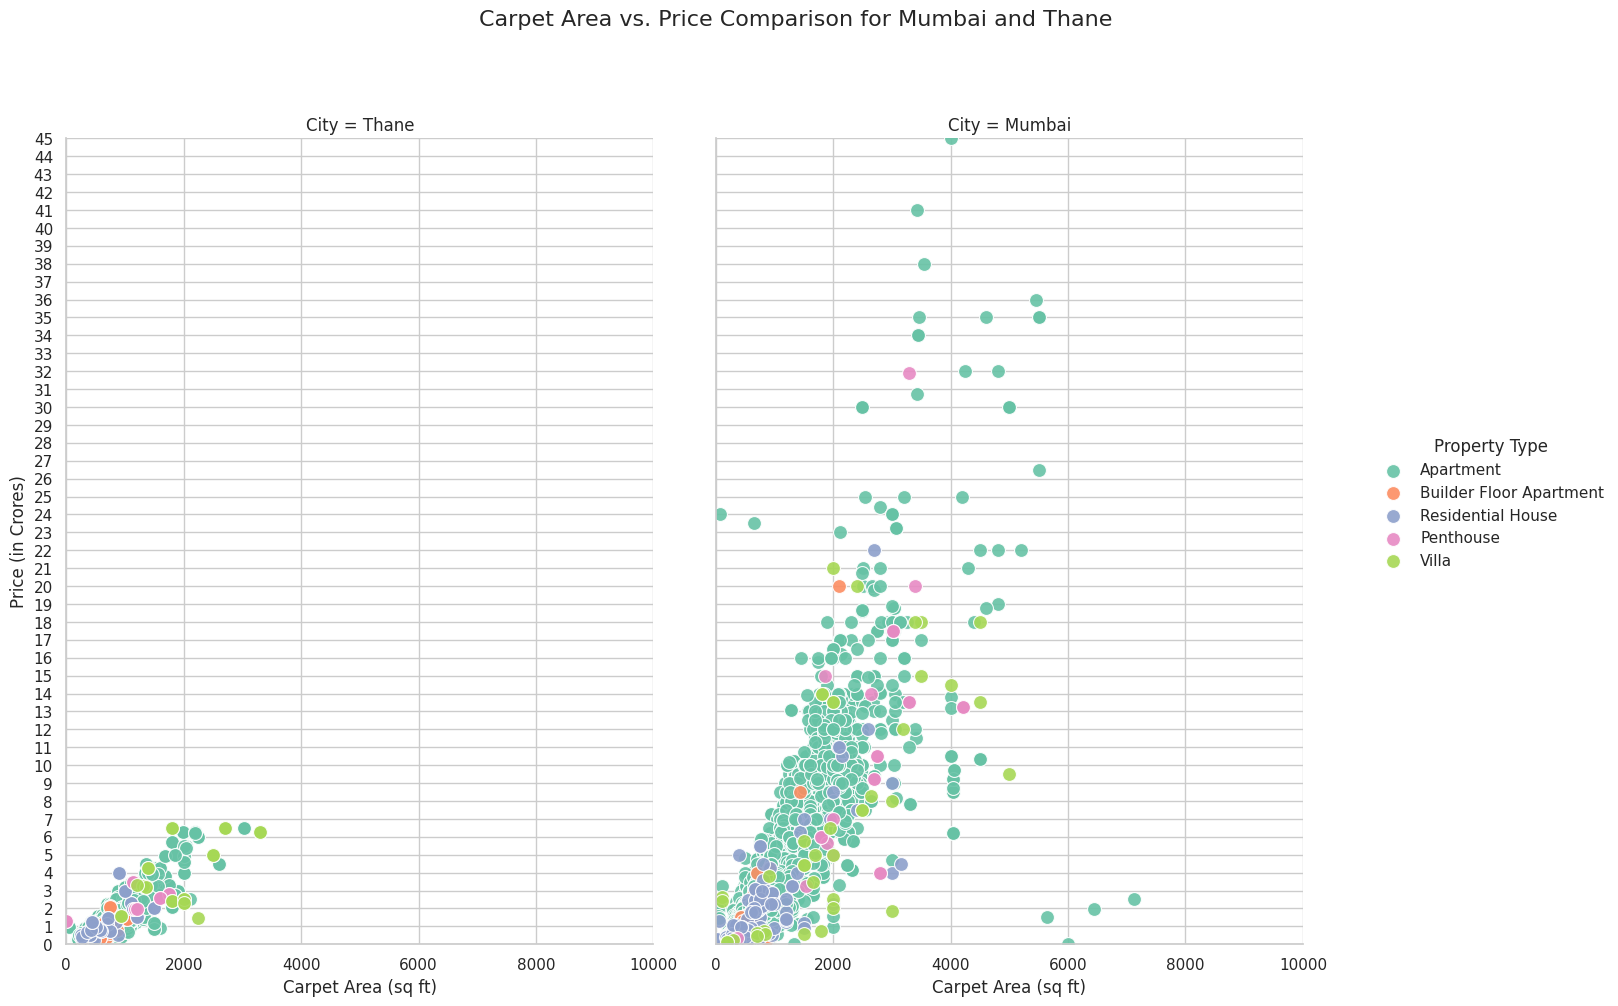

In [165]:
    # Carpet area vs price in mumbai and thane with different types of property
import seaborn as sns

combined_data = cities_of_interest[(cities_of_interest['City'].isin(['Mumbai', 'Thane']))].copy()
combined_data['Price (Cr)'] = combined_data['Price'] / 1e7
carpet_area_min, carpet_area_max = 0, 10000
price_min, price_max = 0, 45 
fg = sns.FacetGrid(combined_data, col='City', hue='Type of Property', height=10, aspect=0.7, palette='Set2')

fg.map(sns.scatterplot, 'Carpet Area', 'Price (Cr)', alpha=0.9, s=100)

fg.set(xlim=(carpet_area_min, carpet_area_max), ylim=(price_min, price_max))
fg.set_axis_labels('Carpet Area (sq ft)', 'Price (in Crores)')
plt.yticks(range(0, 46, 1))
fg.fig.suptitle('Carpet Area vs. Price Comparison for Mumbai and Thane', fontsize=16, y=1.02)
fg.add_legend(title='Property Type')
fg.tight_layout(pad=2)

plt.show()


### Question 4
- Step 1: Cleaning data , crating quantiles per city and also findig median price for city and localities
- Step 2 : plotted intractive bar for avg price and avg carpet area for each city and locality
- Step 3: Plotted bar chart showing  avg carpet area in prime and non prime location of each city

In [166]:
# median prices for each city and area
median_prices = df_cleaned.groupby(['City', 'Area Name'])['Price'].median().reset_index()
median_prices.rename(columns={'Price': 'Median Price'}, inplace=True)
# overall median price for the city
city_median_prices = median_prices.groupby('City')['Median Price'].median().reset_index()
city_median_prices.rename(columns={'Median Price': 'City Median Price'}, inplace=True)
# mergig both median price to compare between less ex more ex
median_prices = median_prices.merge(city_median_prices, on='City')
# categroise in low and high
median_prices['Category'] = median_prices['Median Price'] <= median_prices['City Median Price']
median_prices['Category'] = median_prices['Category'].map({True: 'Less Expensive', False: 'More Expensive'})

avg_carpet_area = df_cleaned.groupby(['City', 'Area Name'])['Carpet Area'].mean().reset_index()
avg_carpet_area.rename(columns={'Carpet Area': 'Average Carpet Area'}, inplace=True)
plot_data = median_prices.merge(avg_carpet_area, on=['City', 'Area Name'])

#as there are many localties we ahev created intactive plot , each dot shows localities 
fig = px.scatter(
     plot_data,
    x='Average Carpet Area',
    y='Median Price',
    color='Category',
    color_discrete_map={'Less Expensive': 'blue', 'More Expensive': 'red'},
    hover_name='Area Name',
    facet_col='City',
    facet_col_wrap=1,  # Number of plots per row
    height=3000,  # Adjust height as needed
    title='Average Price vs Average Carpet Area by City',
    labels={'Average Carpet Area': 'Average Carpet Area (sq ft)', 'Median Price': 'Median Price (INR)'}
)

fig.show()


/tmp/ipykernel_3926/186519831.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



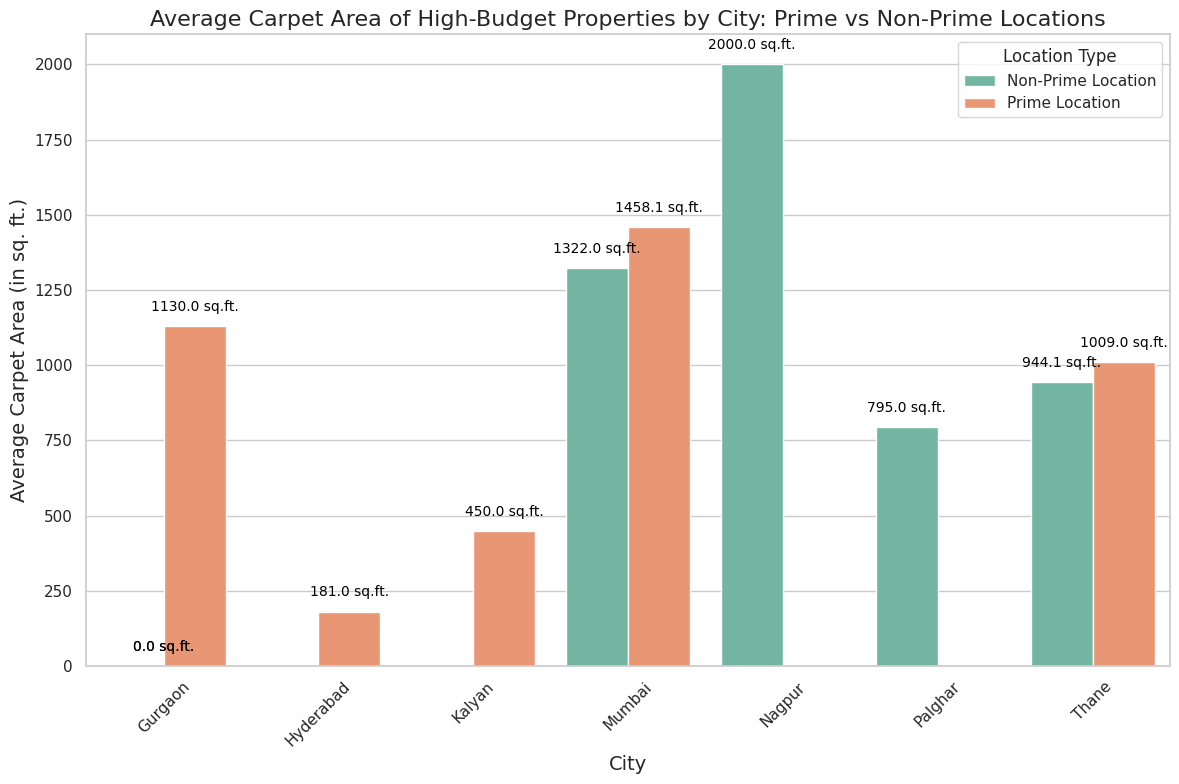

Average price per city prime vs non prime location
Gurgaon - Non-Prime Location: nan Cr, Prime Location: 0.35 Cr
Hyderabad - Non-Prime Location: nan Cr, Prime Location: 0.80 Cr
Kalyan - Non-Prime Location: nan Cr, Prime Location: 0.48 Cr
Mumbai - Non-Prime Location: 5.31 Cr, Prime Location: 8.65 Cr
Nagpur - Non-Prime Location: 0.90 Cr, Prime Location: nan Cr
Palghar - Non-Prime Location: 0.55 Cr, Prime Location: nan Cr
Thane - Non-Prime Location: 1.87 Cr, Prime Location: 2.14 Cr


In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
# here we are calculatign city wie high budget scores 
def price_category_by_city(df):
    city_cap = {}
    
    for city in df['City'].unique():
        city_data = df[df['City'] == city]
        quantiles = city_data['Price'].quantile([0.67]).values[0]
        city_cap[city] = quantiles
        # print(quantiles,city)
    
    def categorize(price, city):
        return 'High' if price >= city_cap[city] else 'Non-High'
    
    return df.apply(lambda row: categorize(row['Price'], row['City']), axis=1)

df_cleaned['price_category'] = price_category_by_city(df_cleaned)
high_budget_properties = df_cleaned[df_cleaned['price_category'] == 'High']
avg_carpet_area_by_city_location = high_budget_properties.groupby(['City', 'isPrimeLocationProperty'])['Carpet Area'].mean().unstack().reset_index()
avg_carpet_area_by_city_location.columns = ['City', 'Non-Prime Location', 'Prime Location'] #error
avg_price_by_city_location = high_budget_properties.groupby(['City', 'isPrimeLocationProperty'])['Price'].mean().unstack().reset_index()
avg_price_by_city_location.columns = ['City', 'Non-Prime Location', 'Prime Location']
avg_carpet_area_long = avg_carpet_area_by_city_location.melt(id_vars='City', var_name='Location Type', value_name='Average Carpet Area')

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=avg_carpet_area_long, x='City', y='Average Carpet Area', hue='Location Type', palette="Set2")
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 50, f'{height:.1f} sq.ft.', ha='center', fontsize=10, color='black')
for city in avg_price_by_city_location['City']:
    for location_type in ['Non-Prime Location', 'Prime Location']:
        avg_price = avg_price_by_city_location[avg_price_by_city_location['City'] == city][location_type].values[0]
        avg_price_cr = avg_price / 1e7
        bars = ax.patches
plt.title('Average Carpet Area of High-Budget Properties by City: Prime vs Non-Prime Locations', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Average Carpet Area (in sq. ft.)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Location Type')

plt.tight_layout()
plt.show()
print("Average price per city prime vs non prime location")
for city in avg_price_by_city_location['City']:
    non_prime_price = avg_price_by_city_location[avg_price_by_city_location['City'] == city]['Non-Prime Location'].values[0]
    prime_price = avg_price_by_city_location[avg_price_by_city_location['City'] == city]['Prime Location'].values[0]
    print(f"{city} - Non-Prime Location: {non_prime_price / 1e7:.2f} Cr, Prime Location: {prime_price / 1e7:.2f} Cr")


### Question 5
- Step 1: Cleaned data , dropped rows with invalid carpet area or price
- Step 2: Plotted barchart for top 20 areas with best properties in terms of carpet area and price

/tmp/ipykernel_3926/2995438376.py:1: DtypeWarning:

Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_3926/2995438376.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




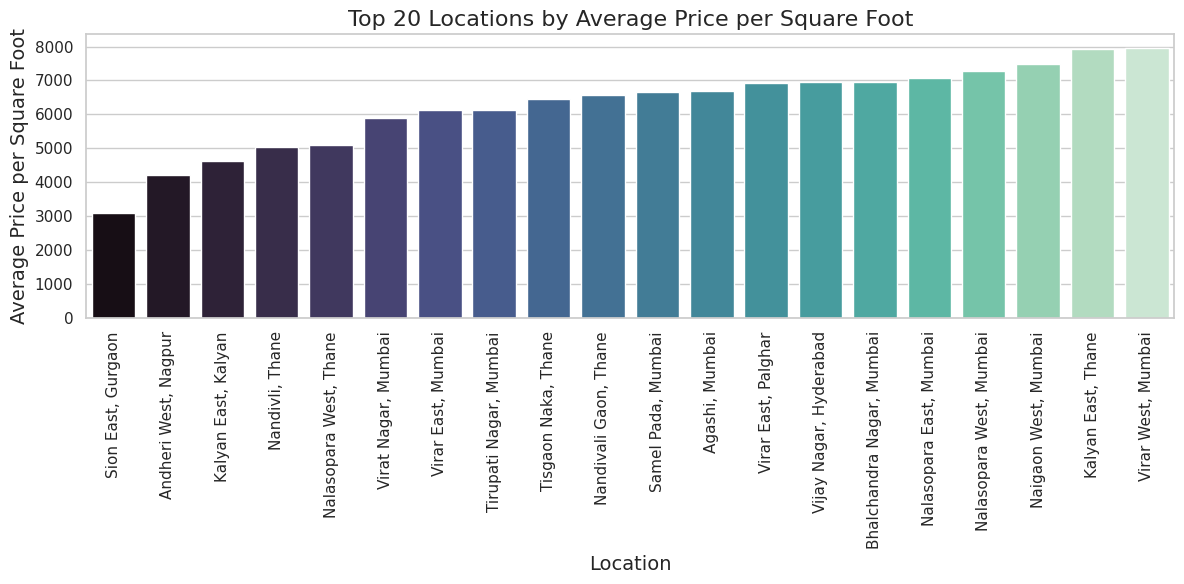

                      Location   sqft Price
289         Sion East, Gurgaon  3097.345133
15        Andheri West, Nagpur  4203.703704
135        Kalyan East, Kalyan  4613.755230
221            Nandivli, Thane  5036.512668
219     Nalasopara West, Thane  5084.745763
331        Virat Nagar, Mumbai  5891.177432
327         Virar East, Mumbai  6126.606087
308     Tirupati Nagar, Mumbai  6133.386076
309        Tisgaon Naka, Thane  6461.538462
220      Nandivali Gaon, Thane  6579.824384
265         Samel Pada, Mumbai  6645.740950
3               Agashi, Mumbai  6684.848422
328        Virar East, Palghar  6918.238994
323     Vijay Nagar, Hyderabad  6954.545455
30   Bhalchandra Nagar, Mumbai  6959.626289
217    Nalasopara East, Mumbai  7075.017648
218    Nalasopara West, Mumbai  7280.370386
216       Naigaon West, Mumbai  7479.433374
136         Kalyan East, Thane  7930.342400
329         Virar West, Mumbai  7961.802714


In [168]:

data = pd.read_csv('properties.csv')
data['sqft Price'] = data['Price'] / data['Carpet Area']
#cleaning
data = data[(data['Price'] > 0) & (data['Carpet Area'] > 0)]

location_avg_sqft_price = data.groupby('Location')['sqft Price'].mean().reset_index()
sorted_locations = location_avg_sqft_price.sort_values(by='sqft Price')
# sicne data is big taking top 20 locations
top_locations = sorted_locations.head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='sqft Price', data=top_locations, palette='mako')
plt.title('Top 20 Locations by Average Price per Square Foot', fontsize=16)
plt.ylabel('Average Price per Square Foot', fontsize=14)
plt.xlabel('Location', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(top_locations)

### Question 6


/tmp/ipykernel_3926/4163101584.py:2: DtypeWarning:

Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_3926/4163101584.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3926/4163101584.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3926/4163101584.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

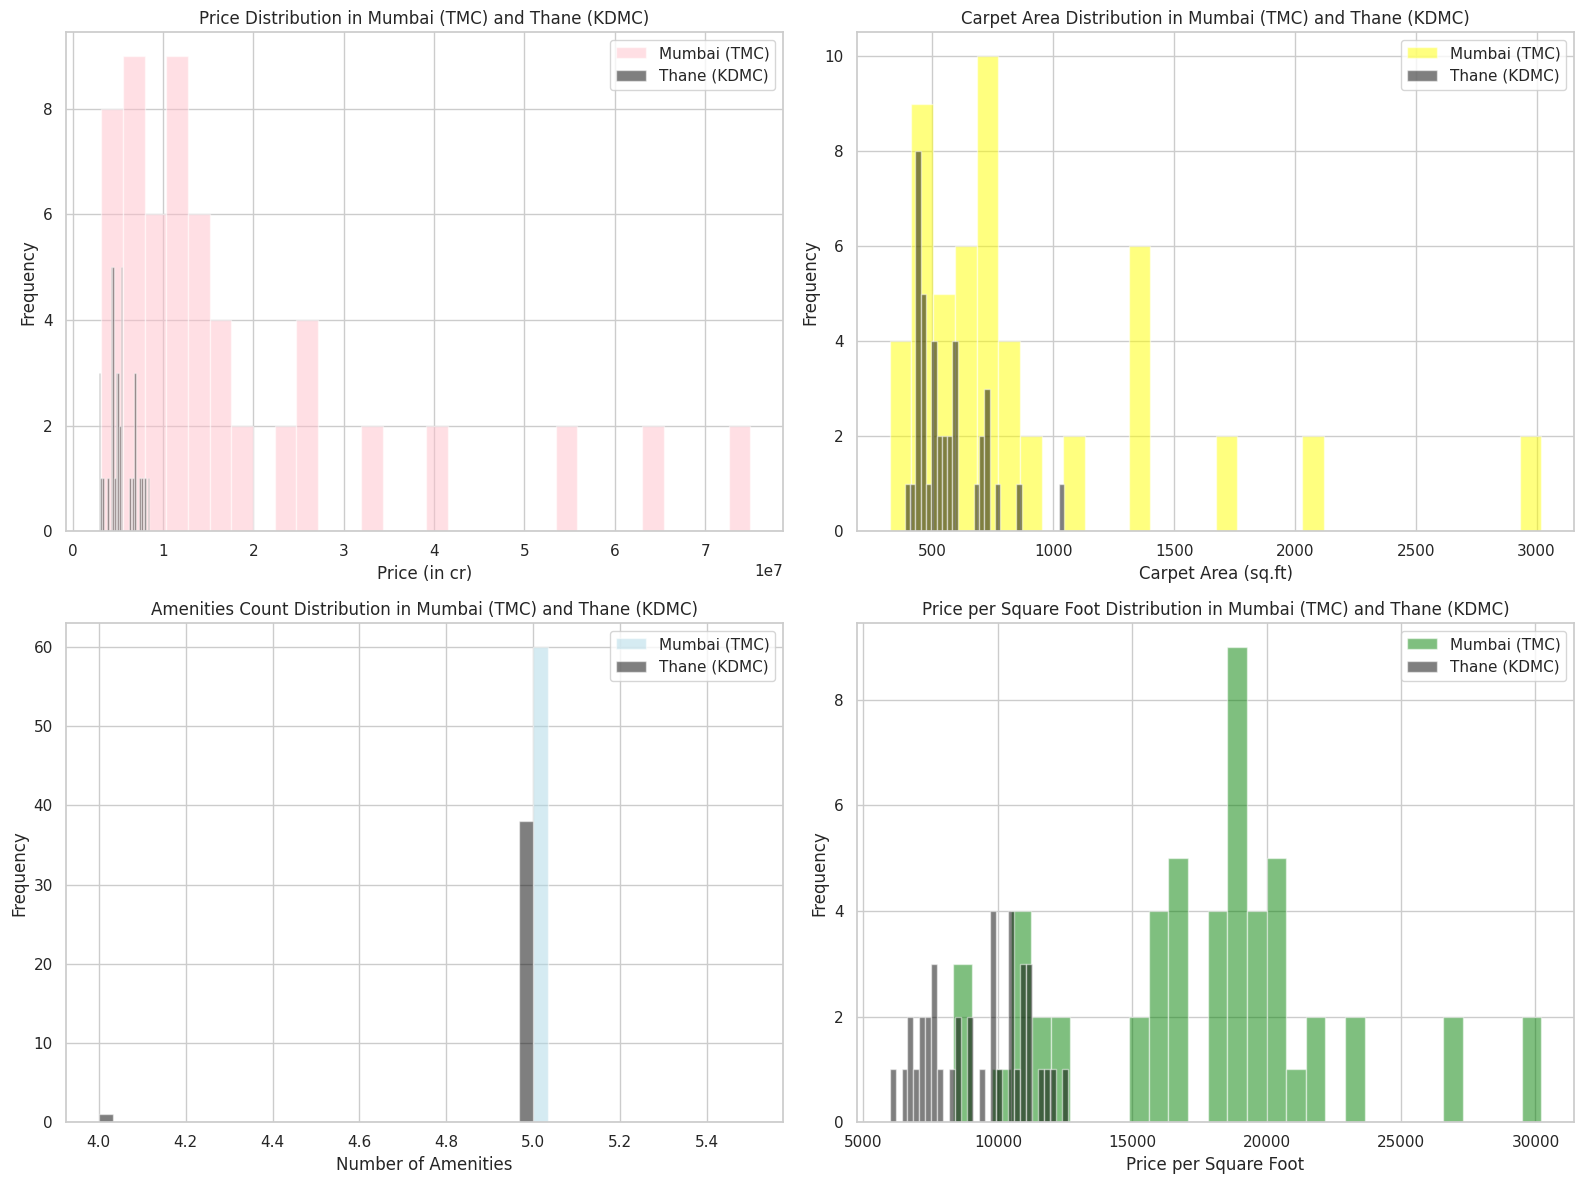

      City      Price  Carpet Area    sqft Price  Amenities Count
1    Thane  6300000.0        579.0  10880.829016                5
28   Thane  4300000.0        505.0   8514.851485                5
53   Thane  4300000.0        505.0   8514.851485                5
91   Thane  4800000.0        709.0   6770.098731                5
92   Thane  4700000.0        461.0  10195.227766                5
93   Thane  7999992.0        853.0   9378.654162                5
180  Thane  8500000.0        675.0  12592.592593                5
208  Thane  4500000.0        542.0   8302.583026                5
219  Thane  4500000.0        450.0  10000.000000                5
229  Thane  5000000.0        460.0  10869.565217                5
236  Thane  4400000.0        580.0   7586.206897                5
244  Thane  5000000.0        460.0  10869.565217                5
251  Thane  4400000.0        580.0   7586.206897                5
281  Thane  3200000.0        385.0   8311.688312                5
339  Thane

In [169]:
file_path = 'properties.csv'
properties_df = pd.read_csv(file_path)

commercial_properties = properties_df[
    (properties_df['Commercial'] == 'Y') & 
    (properties_df['Approved Authority Name'].isin(['TMC', 'KDMC']))
]
# we have assumend only these many aminities
amenities_columns = ['Air Conditioned', 'Gymnasium', 'Swimming Pool', 'Parking', 'Security', 'Club House']
for col in amenities_columns:
    commercial_properties[col] = pd.to_numeric(commercial_properties[col], errors='coerce').fillna(0).astype(int)

#getting all coun tof aminities
commercial_properties['Amenities Count'] = commercial_properties[amenities_columns].sum(axis=1)
plt.figure(figsize=(16, 12))

# 1. Plotting Price distribution in Mumbai (TMC) and Thane (KDMC)
plt.subplot(2, 2, 1)
commercial_properties[commercial_properties['Approved Authority Name'] == 'TMC']['Price'].plot(kind='hist', color='pink', alpha=0.5, bins=30)
commercial_properties[commercial_properties['Approved Authority Name'] == 'KDMC']['Price'].plot(kind='hist', color='black', alpha=0.5, bins=30)
plt.title('Price Distribution in Mumbai (TMC) and Thane (KDMC)')
plt.xlabel('Price (in cr)')
plt.ylabel('Frequency')
plt.legend(['Mumbai (TMC)', 'Thane (KDMC)'])

# 2. Plotting Carpet Area distribution in Mumbai (TMC) and Thane (KDMC)
plt.subplot(2, 2, 2)
commercial_properties[commercial_properties['Approved Authority Name'] == 'TMC']['Carpet Area'].plot(kind='hist', color='yellow', alpha=0.5, bins=30)
commercial_properties[commercial_properties['Approved Authority Name'] == 'KDMC']['Carpet Area'].plot(kind='hist', color='black', alpha=0.5, bins=30)
plt.title('Carpet Area Distribution in Mumbai (TMC) and Thane (KDMC)')
plt.xlabel('Carpet Area (sq.ft)')
plt.ylabel('Frequency')
plt.legend(['Mumbai (TMC)', 'Thane (KDMC)'])

# 3. Plotting Amenities count distribution
plt.subplot(2, 2, 3)
commercial_properties[commercial_properties['Approved Authority Name'] == 'TMC']['Amenities Count'].plot(kind='hist', color='lightblue', alpha=0.5, bins=30)
commercial_properties[commercial_properties['Approved Authority Name'] == 'KDMC']['Amenities Count'].plot(kind='hist', color='black', alpha=0.5, bins=30)
plt.title('Amenities Count Distribution in Mumbai (TMC) and Thane (KDMC)')
plt.xlabel('Number of Amenities')
plt.ylabel('Frequency')
plt.legend(['Mumbai (TMC)', 'Thane (KDMC)'])

# 4. Plotting Price per Square Foot distribution
commercial_properties['sqft Price'] = commercial_properties['Price'] / commercial_properties['Carpet Area']

plt.subplot(2, 2, 4)
commercial_properties[commercial_properties['Approved Authority Name'] == 'TMC']['sqft Price'].plot(kind='hist', color='green', alpha=0.5, bins=30)
commercial_properties[commercial_properties['Approved Authority Name'] == 'KDMC']['sqft Price'].plot(kind='hist', color='black', alpha=0.5, bins=30)
plt.title('Price per Square Foot Distribution in Mumbai (TMC) and Thane (KDMC)')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.legend(['Mumbai (TMC)', 'Thane (KDMC)'])

plt.tight_layout()
plt.show()
print(commercial_properties[['City', 'Price', 'Carpet Area', 'sqft Price', 'Amenities Count']].head(20))

### Question 7
- Step 1: Took assumption of amenities
- Step 2: Comapred properties and thir value addtion between mumbai and thane
- Step 3: Plotted bar chart for the avg property prices with amenties in mumbai and thane

/tmp/ipykernel_3926/3489136621.py:1: DtypeWarning:

Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.



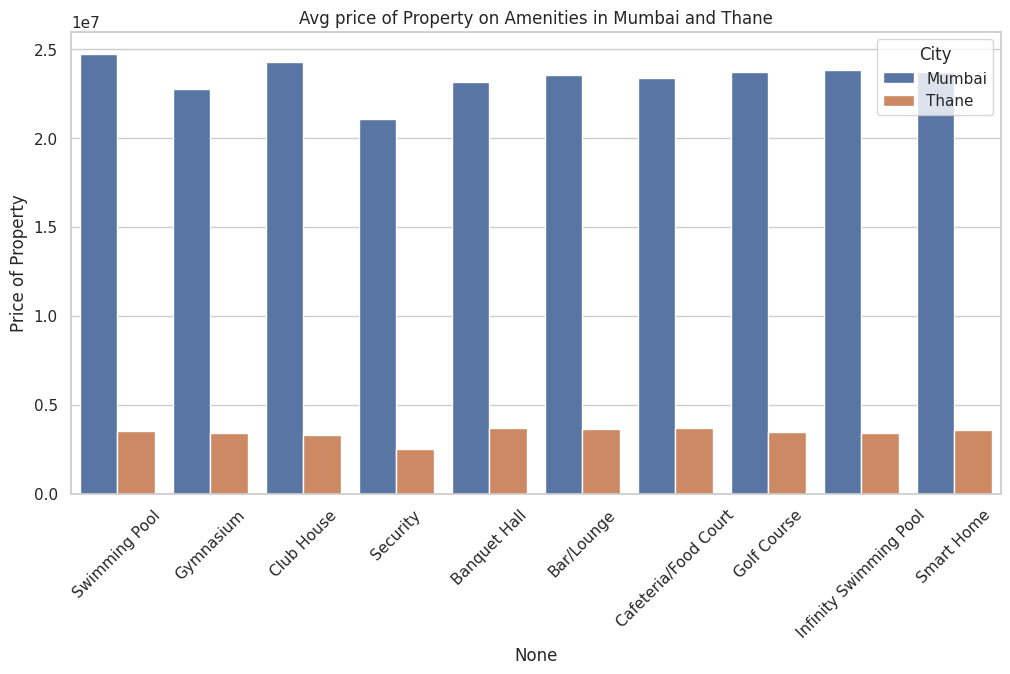

                        With Amenity Avg Price  Without Amenity Avg Price  \
Swimming Pool                     4.277788e+07               1.804550e+07   
Gymnasium                         4.149688e+07               1.877213e+07   
Club House                        4.242446e+07               1.817848e+07   
Security                          3.880279e+07               1.776132e+07   
Banquet Hall                      4.265762e+07               1.952848e+07   
Bar/Lounge                        4.319142e+07               1.968090e+07   
Cafeteria/Food Court              4.310318e+07               1.971912e+07   
Golf Course                       4.346932e+07               1.974906e+07   
Infinity Swimming Pool            4.355035e+07               1.972601e+07   
Smart Home                        4.343495e+07               1.975867e+07   
Swimming Pool                     1.245424e+07               8.950962e+06   
Gymnasium                         1.233300e+07               8.929095e+06   

In [170]:
data = pd.read_csv('properties.csv')

# print(data.head())
# print(data.columns)
data_mumbai = data[data['City'] == 'Mumbai']
data_thane = data[data['City'] == 'Thane']
# took these essential amenities only
amenities = ['Swimming Pool', 'Gymnasium', 'Club House', 'Security','Banquet Hall', 'Bar/Lounge', 'Cafeteria/Food Court','Golf Course', 'Infinity Swimming Pool', 'Smart Home']

def analyze_amenities(data, city_name):
    # Calculate average price for properties with and without each amenity
    results = {}
    for amenity in amenities:
        with_amenity = data[data[amenity] == 1]['Price']
        without_amenity = data[data[amenity] == 0]['Price']
        results[amenity] = {
            'With Amenity Avg Price': with_amenity.mean(),
            'Without Amenity Avg Price': without_amenity.mean(),
            'Price Difference': with_amenity.mean() - without_amenity.mean()
        }
    
    # Convert results to DataFrame for better visualization
    results_df = pd.DataFrame(results).T
    results_df['City'] = city_name
    return results_df

# Analyze for both cities
results_mumbai = analyze_amenities(data_mumbai, 'Mumbai')
results_thane = analyze_amenities(data_thane, 'Thane')

# Combine results
final_results = pd.concat([results_mumbai, results_thane])

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=final_results.index, y='Price Difference', hue='City', data=final_results.reset_index())
plt.title('Avg price of Property on Amenities in Mumbai and Thane')
plt.ylabel('Price of Property')
plt.xticks(rotation=45)
plt.show()

# Display the final results
print(final_results)

### Question 8
- Step1 : Cleaning data , formatting dates in aviliability colomn , and replacing everyting with under construction which is not ready to move i.e removing dates from this colomn.
- Step 2: Crating plot : Price vs availibility date and possession status , creating intractive plot also for better user experince.
- Step 3: Plotting How does price changes with possession status vary between Mumbai and Thane

In [171]:
# dropping the rows wich don't have posession status or price or city
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
df8 = df.copy()
df_cleaned = df8.dropna(subset=['Possession Status','Price', 'City'])

def parse_custom_date(date_str):
    if isinstance(date_str, str):
        try:
            return datetime.strptime(date_str, "%b '%y")
        except ValueError:
            return pd.NaT
    return pd.NaT

def normalize_possession_status(status):
    if isinstance(status, str) and status.strip().lower() == 'ready to move':
        return 'Ready To Move'
    else:
        return 'Under Construction'
    
df_cleaned['Availability Starts From'] = df_cleaned['Availability Starts From'].apply(parse_custom_date)

df_cleaned['Possession Status'] = df_cleaned['Possession Status'].apply(normalize_possession_status)

/tmp/ipykernel_3926/1718998704.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3926/1718998704.py:24: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [172]:
ready_to_move = df_cleaned[df_cleaned['Possession Status'] == 'Ready To Move']
under_construction = df_cleaned[df_cleaned['Possession Status'] == 'Under Construction']

num_ready_to_move = ready_to_move.shape[0]
num_under_construction = under_construction.shape[0]
avg_price_ready_to_move = ready_to_move['Price'].mean()
avg_price_under_construction = under_construction['Price'].mean()

price_difference = avg_price_ready_to_move - avg_price_under_construction

print(f"Number of Ready To Move Properties: {num_ready_to_move}")
print(f"Number of Under Construction Properties: {num_under_construction}")

print(f"\nAverage Price of Ready To Move Properties: ₹{avg_price_ready_to_move / 1e7:.2f} Cr")
print(f"Average Price of Under Construction Properties: ₹{avg_price_under_construction / 1e7:.2f} Cr")

print(f"\nPrice Difference: ₹{price_difference / 1e7:.2f} Cr")

if price_difference > 0:
    print(f"\nReady-to-move properties are on average ₹{price_difference / 1e7:.2f} Cr more expensive than under-construction ones.")
else:
    print(f"\nUnder-construction properties are on average ₹{-price_difference / 1e7:.2f} Cr more expensive than ready-to-move ones.")


Number of Ready To Move Properties: 9706
Number of Under Construction Properties: 2866

Average Price of Ready To Move Properties: ₹2.70 Cr
Average Price of Under Construction Properties: ₹2.46 Cr

Price Difference: ₹0.24 Cr

Ready-to-move properties are on average ₹0.24 Cr more expensive than under-construction ones.


/tmp/ipykernel_3926/739479755.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3926/739479755.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



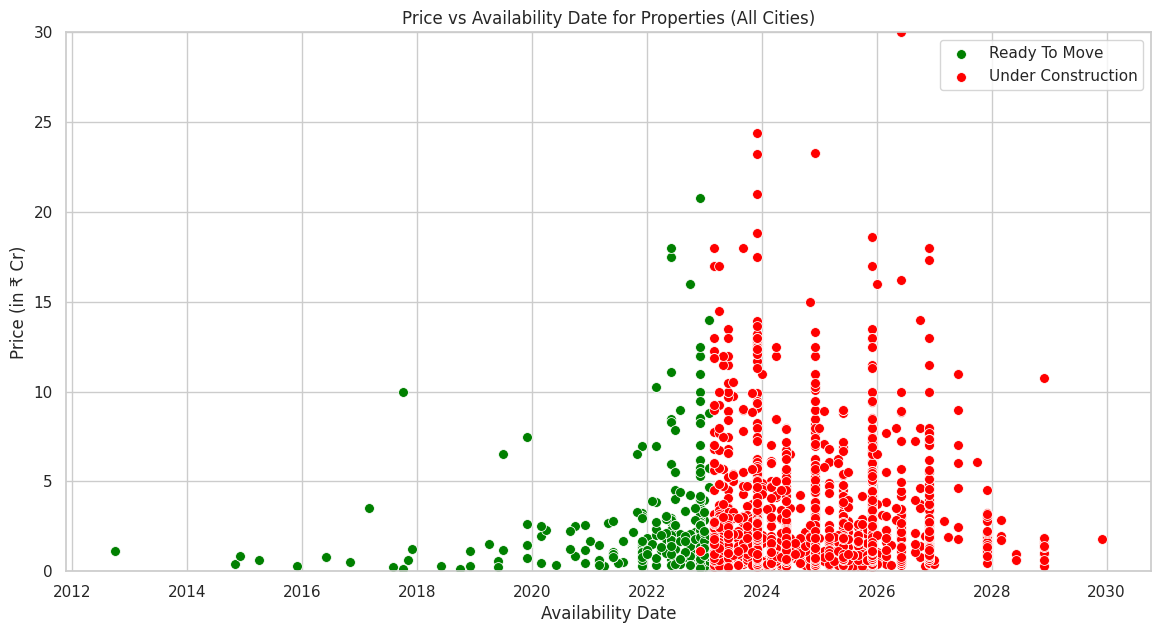

In [173]:
ready_to_move['Price in Cr'] = ready_to_move['Price'] / 1e7
under_construction['Price in Cr'] = under_construction['Price'] / 1e7

plt.figure(figsize=(14, 7))
sns.scatterplot(data=ready_to_move, 
                x='Availability Starts From', y='Price in Cr', color='green', s=50, label='Ready To Move')
sns.scatterplot(data=under_construction, 
                x='Availability Starts From', y='Price in Cr', color='red', s=50, label='Under Construction')

# Set y-axis range and tick intervals
plt.ylim(0, 30)  # Setting the y-axis range from 0 to 45 crores
plt.yticks(range(0, 31, 5))  # Setting tick intervals with a step size of 5 crores

plt.title('Price vs Availability Date for Properties (All Cities)')
plt.xlabel('Availability Date')
plt.ylabel('Price (in ₹ Cr)')
plt.legend()

plt.show()


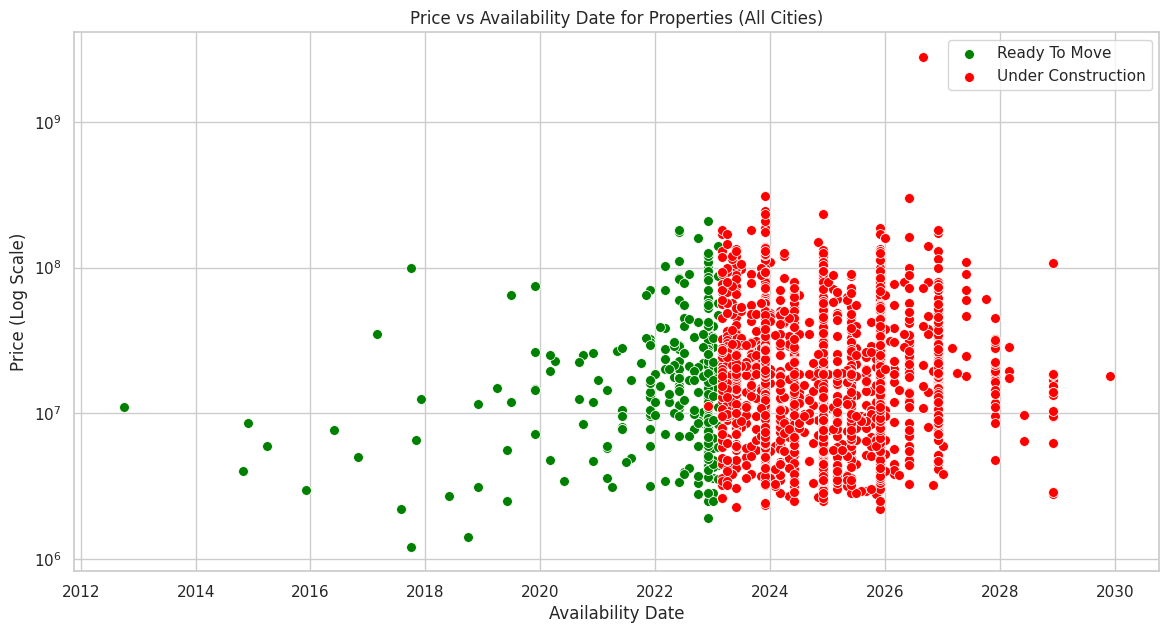

In [174]:
plt.figure(figsize=(14, 7))
sns.scatterplot(data=ready_to_move, 
                x='Availability Starts From', y='Price', color='green', s=50, label='Ready To Move')
sns.scatterplot(data=under_construction, 
                x='Availability Starts From', y='Price', color='red', s=50, label='Under Construction')
plt.yscale('log')
plt.title('Price vs Availability Date for Properties (All Cities)')
plt.xlabel('Availability Date')
plt.ylabel('Price (Log Scale)')
plt.legend()

plt.show()


In [175]:
import plotly.express as px
import plotly.graph_objects as go

# creating intractive plot for better user experiance

under_construction_trace = go.Scatter(
    x=under_construction['Availability Starts From'],
    y=under_construction['Price'],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Under Construction',
    hovertemplate='<b>Availability:</b> %{x}<br><b>Price:</b> %{y}<br>',
)

ready_to_move_trace = go.Scatter(
    x=ready_to_move['Availability Starts From'],
    y=ready_to_move['Price'],
    mode='markers',
    marker=dict(size=10, color='green'),
    name='Ready To Move',
    hovertemplate='<b>Availability:</b> %{x}<br><b>Price:</b> %{y}<br>',
)

fig = go.Figure(data=[under_construction_trace, ready_to_move_trace])

# defining labels
fig.update_layout(
    title='Price vs Availability Date for Properties (All Cities)',
    xaxis_title='Availability Date',
    yaxis_title='Price (in Cr)',
    yaxis=dict(type='log'),  # Set y-axis to log scale
    legend=dict(title='Property Status'),
    hovermode='closest'
)
fig.show()


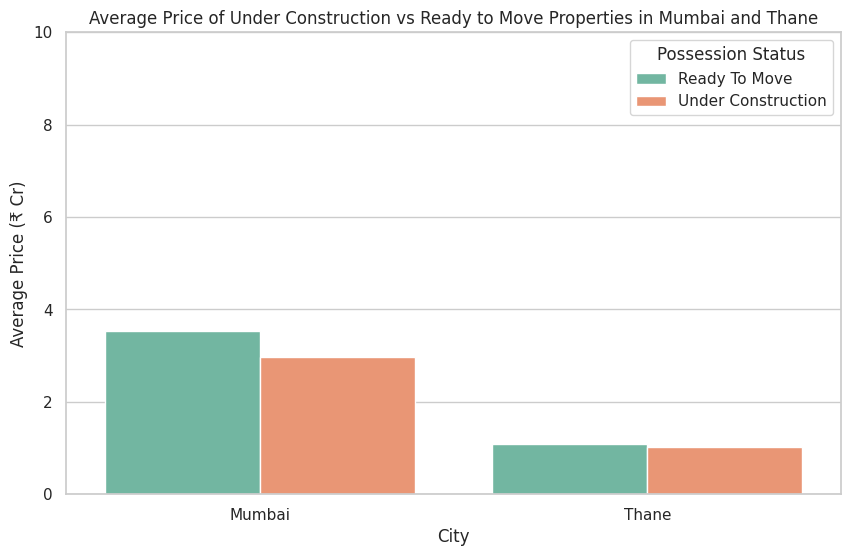

Average Prices in Mumbai:
  Ready To Move: ₹3.54 Cr
  Under Construction: ₹2.96 Cr

Average Prices in Thane:
  Ready To Move: ₹1.10 Cr
  Under Construction: ₹1.02 Cr



In [176]:
# Avg price variation for under construction property and Ready to move property in mumbai and thane 
df_filtered = df_cleaned[df_cleaned['City'].isin(['Mumbai', 'Thane'])]
avg_price_by_status = df_filtered.groupby(['City', 'Possession Status'])['Price'].mean().reset_index()
avg_price_by_status['Price in Cr'] = avg_price_by_status['Price'] / 1e7

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_status, x='City', y='Price in Cr', hue='Possession Status', palette='Set2')

plt.title('Average Price of Under Construction vs Ready to Move Properties in Mumbai and Thane')
plt.ylabel('Average Price (₹ Cr)')
plt.xlabel('City')
plt.ylim(0, 10)
plt.legend(title='Possession Status', loc='upper right')

plt.show()
for city in avg_price_by_status['City'].unique():
    city_data = avg_price_by_status[avg_price_by_status['City'] == city]
    print(f"Average Prices in {city}:")
    for _, row in city_data.iterrows():
        status = row['Possession Status']
        avg_price = row['Price in Cr']
        print(f"  {status}: ₹{avg_price:.2f} Cr")
    print()


/tmp/ipykernel_3926/1301315286.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/tmp/ipykernel_3926/1301315286.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




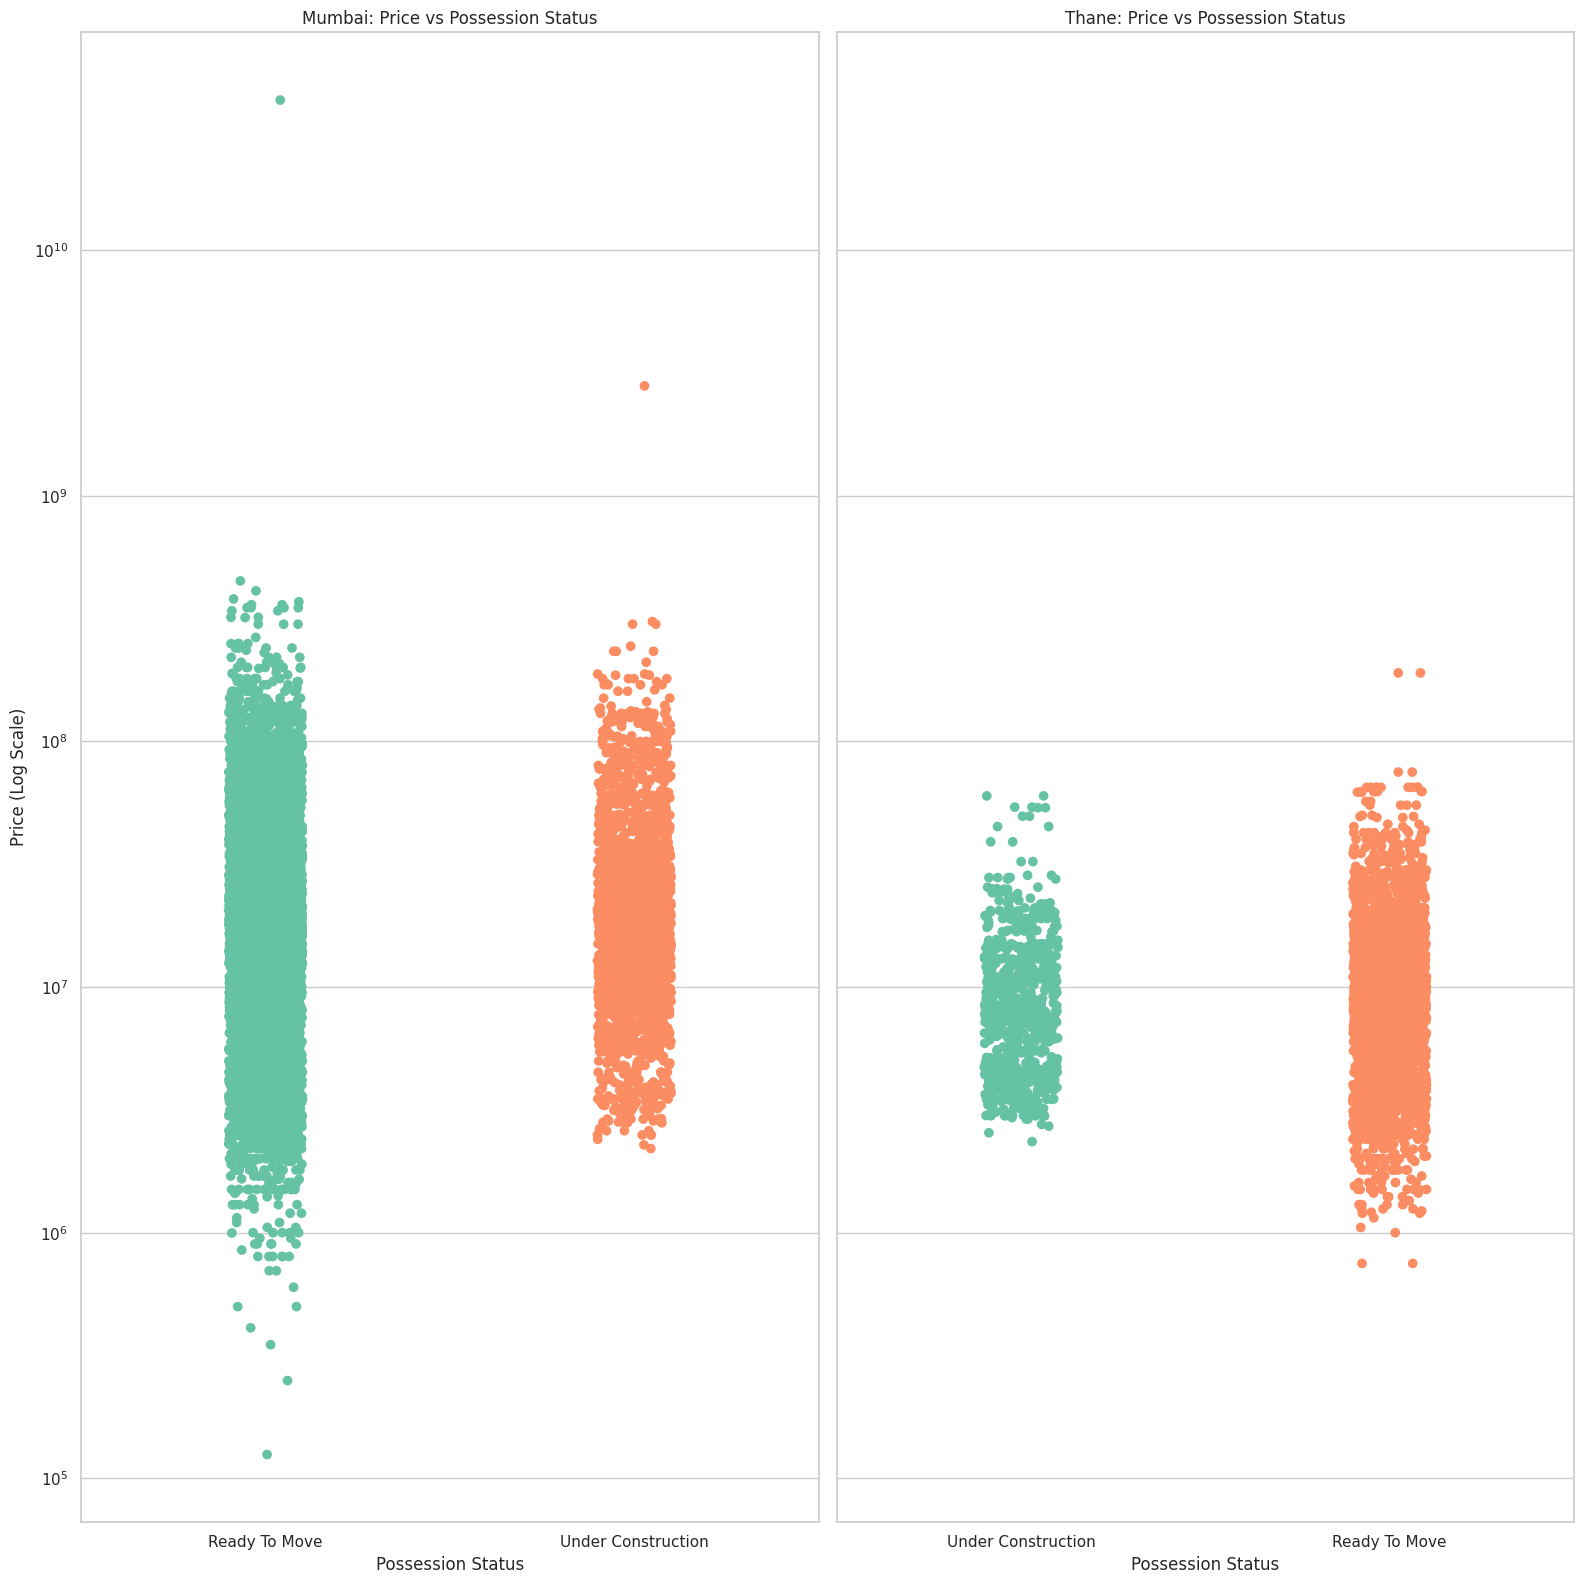

In [177]:
# How does price changes with possession status vary between Mumbai and Thane
fig, axs = plt.subplots(1, 2, figsize=(16, 16), sharey=True)

sns.stripplot(data=df_cleaned[df_cleaned['City'] == 'Mumbai'], 
              x='Possession Status', y='Price', ax=axs[0], palette='Set2', jitter=True, size=7)
axs[0].set_title('Mumbai: Price vs Possession Status')
axs[0].set_ylabel('Price (Log Scale)')
axs[0].set_yscale('log')

sns.stripplot(data=df_cleaned[df_cleaned['City'] == 'Thane'], 
              x='Possession Status', y='Price', ax=axs[1], palette='Set2', jitter=True, size=7)
axs[1].set_title('Thane: Price vs Possession Status')
# axs[1].set_yscale('log')

plt.tight_layout()
plt.show()


### Question 9
- Step 1: Data cleaing , dropping rows without developer
- Step 2: Choosing key amenities and creating amenities score by taking sum of all amenities for each developer
- Step 3: Since there are 983 developers we are choosing top 20 developers by amenity score
- Step 4: Plotting avg property price vs developer and aminity score vs developer

In [178]:
# unique_developers = df_cleaned['Developer'].unique().tolist()
# print(unique_developers)

/tmp/ipykernel_3926/128698875.py:41: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




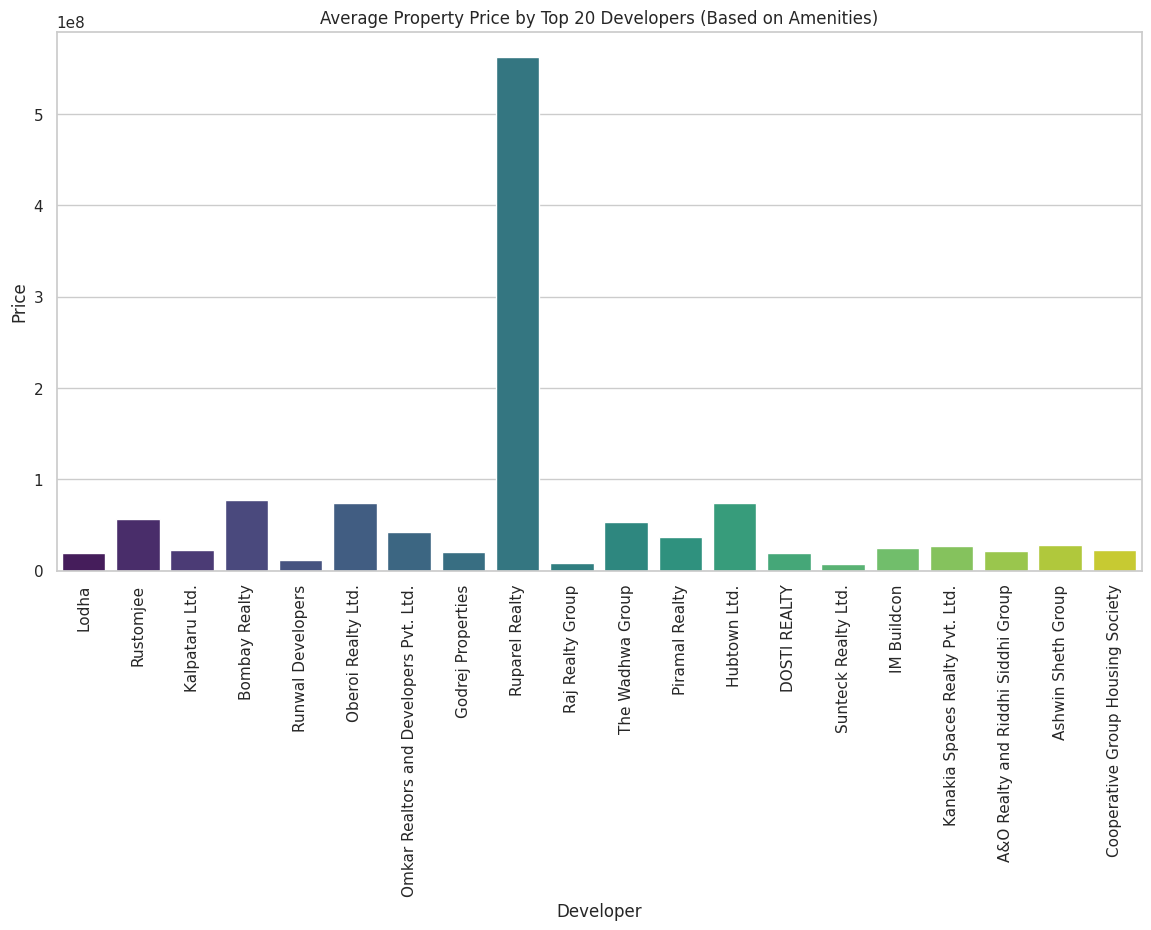

/tmp/ipykernel_3926/128698875.py:47: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




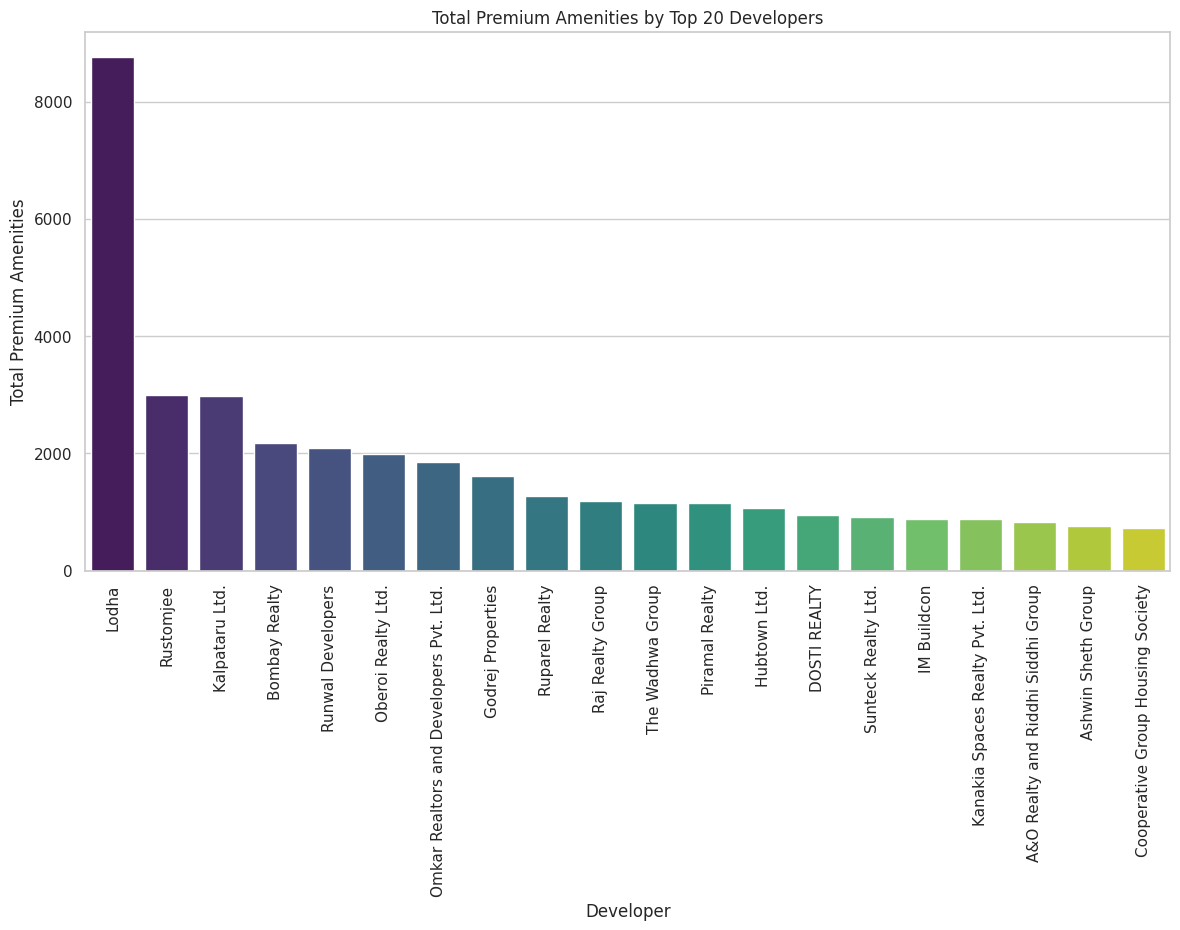

In [179]:
# choosing amenities
amenities = ['Developer', 'Price', 'Club House', 'Swimming Pool', 'Gymnasium', 'Outdoor Tennis Courts',
             'Private Terrace/Garden', 'Vaastu Compliant', 'Air Conditioned', 'Banquet Hall', 'Bar/Lounge', 'Cafeteria/Food Court',
             'Private Jaccuzi', 'Mini Cinema Theatre', 'Event Space & Amphitheatre', 'Helipad',
             'Golf Course', 'Infinity Swimming Pool', 'Smart Home', 'Concierge Services', 'Wine Cellar', 'Sky Villa', 'Fireplace']
df9 = df.copy()
df_cleaned = df9[(df9['Price (English)'] != '280 Cr') & (df9['Price (English)'] != '4080 Cr')]

df_selected = df9[amenities]
# finding amenities score by developer
grouped = df_selected.groupby('Developer').agg({
    'Price': 'mean',
    'Club House': 'sum',
    'Swimming Pool': 'sum',
    'Gymnasium': 'sum',
    'Outdoor Tennis Courts': 'sum',
    'Private Terrace/Garden': 'sum',
    'Vaastu Compliant': 'sum',
    'Air Conditioned': 'sum',
    'Banquet Hall': 'sum',
    'Bar/Lounge': 'sum',
    'Cafeteria/Food Court': 'sum',
    'Private Jaccuzi': 'sum',
    'Mini Cinema Theatre': 'sum',
    'Event Space & Amphitheatre': 'sum',
    'Helipad': 'sum',
    'Golf Course': 'sum',
    'Infinity Swimming Pool': 'sum',
    'Smart Home': 'sum',
    'Concierge Services': 'sum',
    'Wine Cellar': 'sum',
    'Sky Villa': 'sum',
    'Fireplace': 'sum'
})

grouped['Total Premium Amenities'] = grouped.iloc[:, 1:].sum(axis=1)

top_20_developers = grouped.sort_values(by='Total Premium Amenities', ascending=False).head(20)

plt.figure(figsize=(14, 7))
sns.barplot(data=top_20_developers.reset_index(), x='Developer', y='Price', palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Property Price by Top 20 Developers (Based on Amenities)')
plt.show()

plt.figure(figsize=(14, 7))
sns.barplot(data=top_20_developers.reset_index(), x='Developer', y='Total Premium Amenities', palette='viridis')
plt.xticks(rotation=90)
plt.title('Total Premium Amenities by Top 20 Developers')
plt.show()
